In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set to display all columns
pd.set_option('display.max_columns', None)
chicago_flights = pd.read_csv('data/chicago_flights.csv')
chicago_flights

,year,quarter,month,dayofmonth,dayofweek,flightdate,reporting_airline,dot_id_reporting_airline,iata_code_reporting_airline,tail_number,flight_number_reporting_airline,originairportid,originairportseqid,origincitymarketid,origin,origincityname,originstate,originstatefips,originstatename,originwac,destairportid,destairportseqid,destcitymarketid,dest,destcityname,deststate,deststatefips,deststatename,destwac,crsdeptime,deptime,depdelay,depdelayminutes,depdel15,departuredelaygroups,deptimeblk,taxiout,wheelsoff,wheelson,taxiin,crsarrtime,arrtime,arrdelay,arrdelayminutes,arrdel15,arrivaldelaygroups,arrtimeblk,cancelled,cancellationcode,diverted,crselapsedtime,actualelapsedtime,airtime,flights,distance,distancegroup,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,firstdeptime,totaladdgtime,longestaddgtime,divairportlandings,divreacheddest,divactualelapsedtime,divarrdelay,divdistance,divairport
0,2013,1,1,19,6,2013-01-19,9E,20363,9E,N901XJ,3498,13930,1393002,30977,ORD,"Chicago, IL",IL,17,Illinois,41,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,1505,1454,-11,0,0,-1,1500-1559,65,1559,1849,7,1823,1856,33,33,1,2,1800-1859,0,0,0,138,182,110,1,740,3,0,0,33,0,0,0,0,0,0,0,0,0,0,0
1,2013,1,1,20,7,2013-01-20,9E,20363,9E,N922XJ,3498,13930,1393002,30977,ORD,"Chicago, IL",IL,17,Illinois,41,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,1505,1505,0,0,0,0,1500-1559,14,1519,1752,13,1825,1805,-20,0,0,-2,1800-1859,0,0,0,140,120,93,1,740,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2013,1,1,21,1,2013-01-21,9E,20363,9E,N925XJ,3498,13930,1393002,30977,ORD,"Chicago, IL",IL,17,Illinois,41,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,1505,1500,-5,0,0,-1,1500-1559,13,1513,1753,8,1825,1801,-24,0,0,-2,1800-1859,0,0,0,140,121,100,1,740,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2013,1,1,22,2,2013-01-22,9E,20363,9E,N925XJ,3498,13930,1393002,30977,ORD,"Chicago, IL",IL,17,Illinois,41,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,1505,1500,-5,0,0,-1,1500-1559,13,1513,1755,8,1825,1803,-22,0,0,-2,1800-1859,0,0,0,140,123,102,1,740,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2013,1,1,23,3,2013-01-23,9E,20363,9E,N903XJ,3498,13930,1393002,30977,ORD,"Chicago, IL",IL,17,Illinois,41,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,1505,1503,-2,0,0,-1,1500-1559,59,1602,1839,10,1825,1849,24,24,1,1,1800-1859,0,0,0,140,166,97,1,740,3,0,0,24,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59397,2013,1,1,7,1,2013-01-07,WN,19393,WN,N956WN,202,13232,1323202,30977,MDW,"Chicago, IL",IL,17,Illinois,41,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,630,627,-3,0,0,-1,0600-0659,18,645,840,6,900,846,-14,0,0,-1,0900-0959,0,0,0,270,259,235,1,1750,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59398,2013,1,1,7,1,2013-01-07,WN,19393,WN,N8307K,207,13232,1323202,30977,MDW,"Chicago, IL",IL,17,Illinois,41,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,850,855,5,5,0,0,0800-0859,11,906,1054,5,1125,1059,-26,0,0,-2,1100-1159,0,0,0,275,244,228,1,1750,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59399,2013,1,1,7,1,2013-01-07,WN,19393,WN,N8309C,820,13232,1323202,30977,MDW,"Chicago, IL",IL,17,Illinois,41,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,1920,1945,25,25,1,1,1900-1959,10,1955,2145,7,2150,2152,2,2,0,0,2100-2159,0,0,0,270,247,230,1,1750,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59400,2013,1,1,7,1,2013-01-07,WN,19393,WN,N738CB,2532,13232,1323202,30977,MDW,"Chicago, IL",IL,17,Illinois,41,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,1410,1416,6,6,0,0,1400-1459,9,1425,1622,5,1640,1627,-13,0,0,-1,1600-1659,0,0,0,270,251,237,1,1750,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
airport = pd.read_csv('data/airport_id.csv')
airport

,code,description
0,11712,"Greven, Germany: Munster/Osnabruck"
1,11713,"Fort Madison, IA: Fort Madison Municipal"
2,11714,"Fort Myers, FL: Page Field"
3,11715,"Freetown, Sierra Leone: Freetown Lungi"
4,11716,"Funchal, Portugal: Madeira"
...,...,...
6245,12878,"Lafayette, IN: Purdue University"
6246,12879,"Lannion, France: Lannion Airport"
6247,12880,"Lages, Brazil: Lages Airport"
6248,12881,"Aklavik, Canada: Aklavik Airport"


In [24]:
chicago_flights = pd.merge(chicago_flights, airport, left_on='originairportid', right_on='code', how='left')

# Calculate cancellation and delay rates
chicago_flights['cancelled_rate'] = chicago_flights['cancelled'].astype(float)
chicago_flights['delay_rate'] = chicago_flights['depdel15'].astype(float)  # assuming depdel15 indicates delays

# Group by city to calculate city-level average rates
city_level = chicago_flights.groupby('city').agg(
    city_avg_cancelled=pd.NamedAgg(column='cancelled_rate', aggfunc='mean'),
    city_avg_delay=pd.NamedAgg(column='delay_rate', aggfunc='mean')
)

# Group by city and airport code to calculate airport-specific rates, including descriptions
airport_level = chicago_flights.groupby(['city', 'originairportid', 'description']).agg(
    airport_avg_cancelled=pd.NamedAgg(column='cancelled_rate', aggfunc='mean'),
    airport_avg_delay=pd.NamedAgg(column='delay_rate', aggfunc='mean')
).reset_index()

# Merging city-level and airport-level data for comparison
comparison_df = pd.merge(airport_level, city_level, on='city', suffixes=('_airport', '_city'))

# Display the combined DataFrame
comparison_df

,city,originairportid,description,airport_avg_cancelled,airport_avg_delay,city_avg_cancelled,city_avg_delay
0,Abraham Lincoln Capital,14952,"Springfield, IL: Abraham Lincoln Capital",0.034483,0.206897,0.034483,0.206897
1,Akron-Canton Regional,10874,"Akron, OH: Akron-Canton Regional",0.022727,0.189394,0.022727,0.189394
2,Albany International,10257,"Albany, NY: Albany International",0.008264,0.132231,0.008264,0.132231
3,Albuquerque International Sunport,10140,"Albuquerque, NM: Albuquerque International Sun...",0.018868,0.160377,0.018868,0.160377
4,Asheville Regional,10431,"Asheville, NC: Asheville Regional",0.000000,0.196429,0.000000,0.196429
...,...,...,...,...,...,...,...
142,Wilkes Barre Scranton International,10434,"Scranton/Wilkes-Barre, PA: Wilkes Barre Scrant...",0.019608,0.235294,0.019608,0.235294
143,Will Rogers World,13851,"Oklahoma City, OK: Will Rogers World",0.013100,0.222707,0.013100,0.222707
144,William P Hobby,12191,"Houston, TX: William P Hobby",0.011364,0.187500,0.011364,0.187500
145,Yampa Valley,12094,"Hayden, CO: Yampa Valley",0.000000,0.200000,0.000000,0.200000


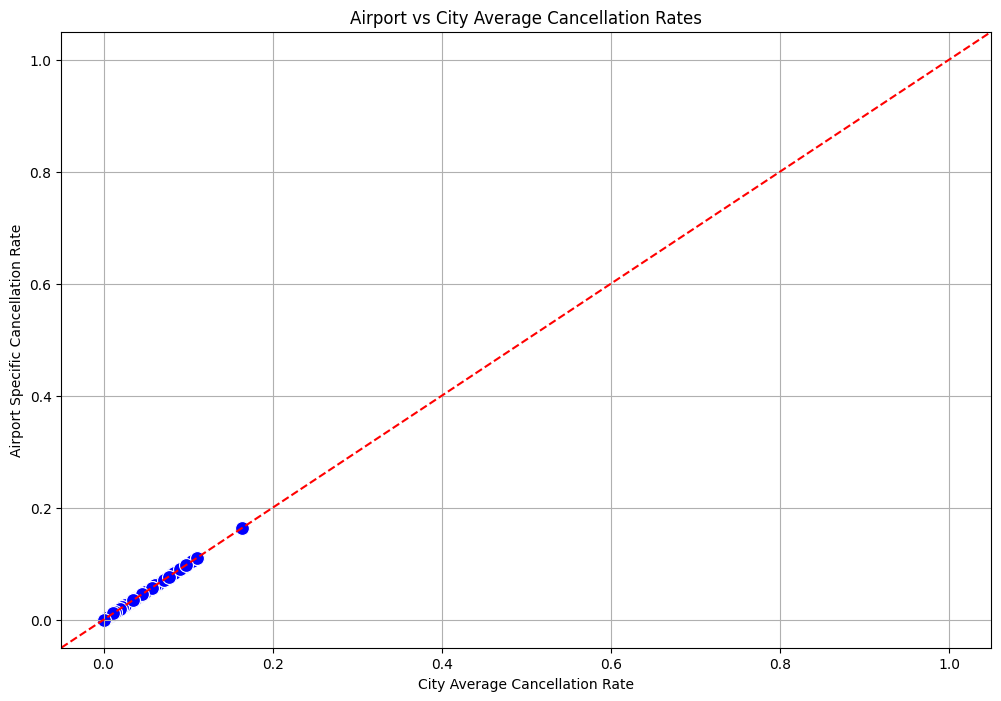

In [25]:
# Create the plot
plt.figure(figsize=(12, 8))
# Plot only the scatter points without differentiating by city, removing 'hue' and 'style'
sns.scatterplot(data=comparison_df, x='city_avg_cancelled', y='airport_avg_cancelled', s=100, color='blue')
# Add a diagonal reference line to indicate where city average matches the airport specific rate
plt.axline((0, 0), (1, 1), color='red', linestyle='--')
# Set plot titles and labels
plt.title('Airport vs City Average Cancellation Rates')
plt.xlabel('City Average Cancellation Rate')
plt.ylabel('Airport Specific Cancellation Rate')
# Enhance grid visibility for better analysis
plt.grid(True)
# Show the plot
plt.show()

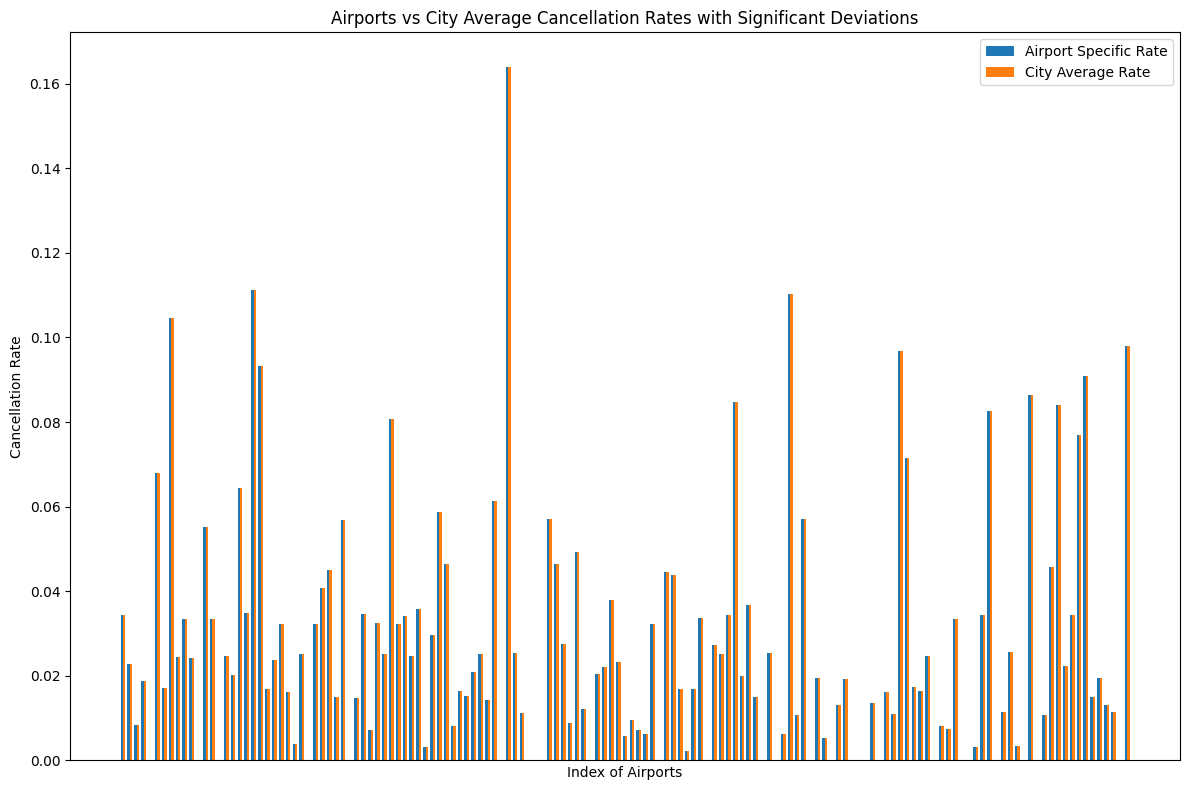

In [32]:
# Calculate deviations and filter significant ones
comparison_df['deviation'] = abs(comparison_df['airport_avg_cancelled'] - comparison_df['city_avg_cancelled'])

fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35

# Only plot significant deviations
indices = np.arange(len(comparison_df))
ax.bar(indices, comparison_df['airport_avg_cancelled'], bar_width, label='Airport Specific Rate')
ax.bar(indices + bar_width, comparison_df['city_avg_cancelled'], bar_width, label='City Average Rate')

ax.set_xlabel('Index of Airports')  # You can change this to 'Index' or other neutral term since labels are not shown
ax.set_ylabel('Cancellation Rate')
ax.set_title('Airports vs City Average Cancellation Rates with Significant Deviations')
# Remove the set_xticks with labels to leave the x-axis without labels
ax.set_xticks([])  # This hides all x-axis labels

ax.legend()

plt.tight_layout()
plt.show()

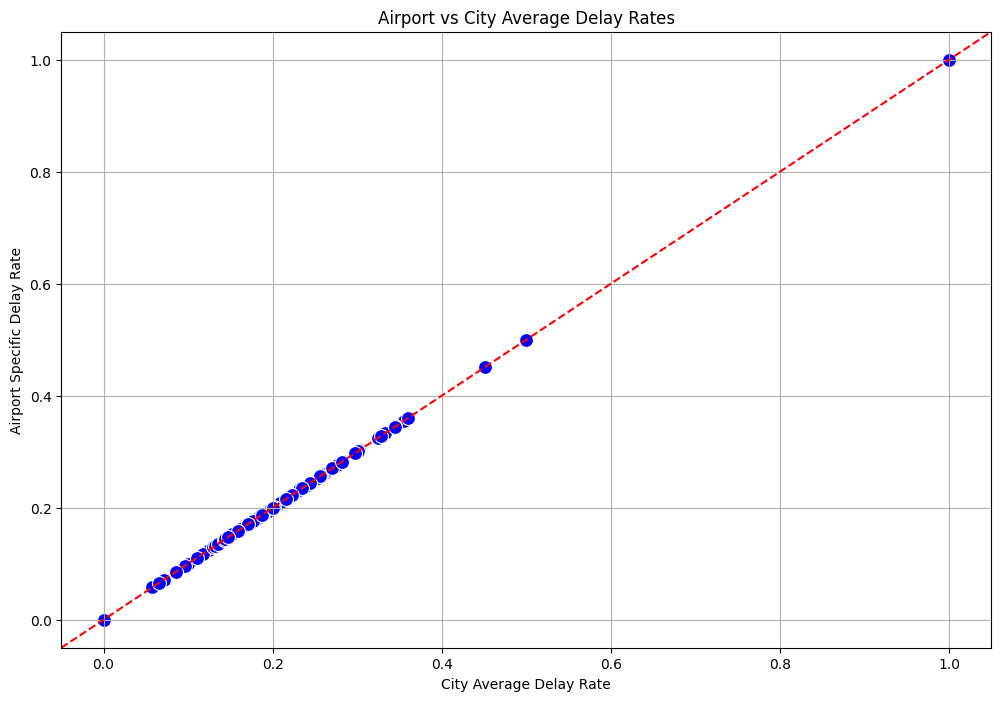

In [33]:
# Create the plot
plt.figure(figsize=(12, 8))
# Plot scatter points for delay rates
sns.scatterplot(data=comparison_df, x='city_avg_delay', y='airport_avg_delay', s=100, color='blue')
# Add a diagonal reference line to indicate where city average matches the airport specific rate
plt.axline((0, 0), (1, 1), color='red', linestyle='--')
# Set plot titles and labels
plt.title('Airport vs City Average Delay Rates')
plt.xlabel('City Average Delay Rate')
plt.ylabel('Airport Specific Delay Rate')
# Enhance grid visibility for better analysis
plt.grid(True)
# Show the plot
plt.show()


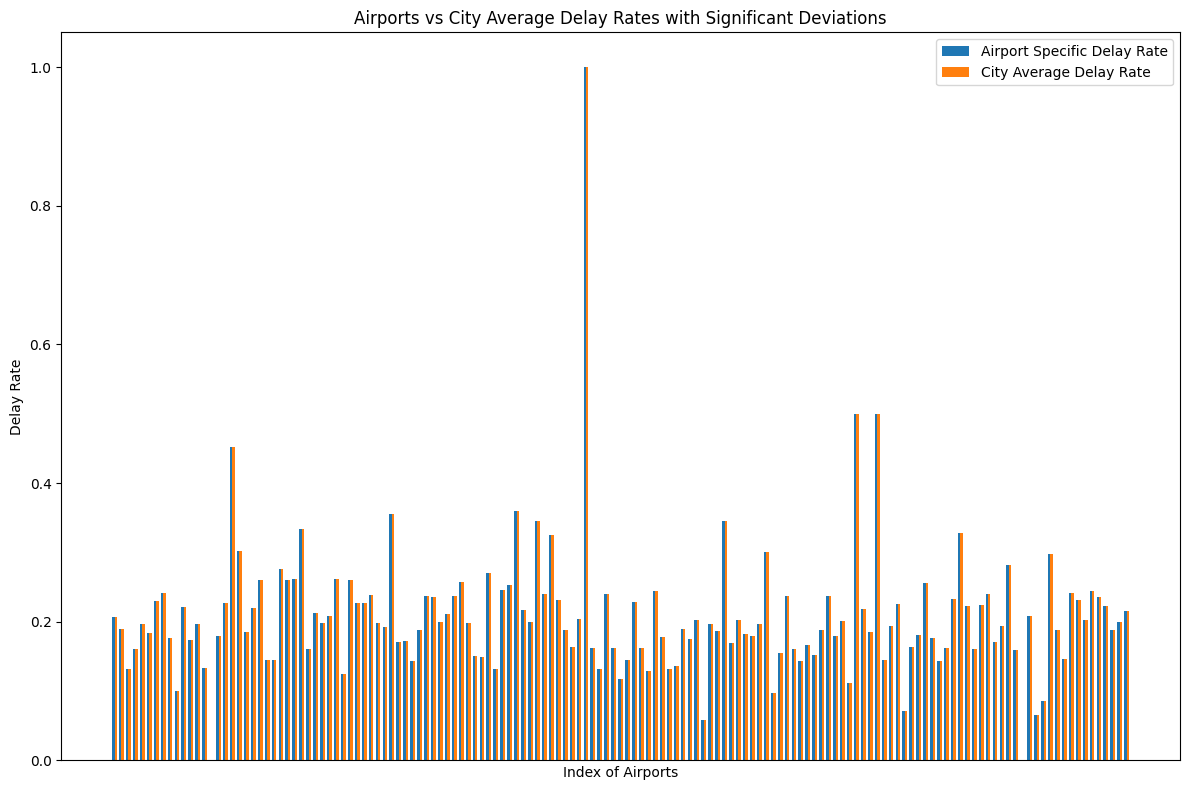

In [34]:
# Calculate deviations for delay rates
comparison_df['deviation_delay'] = abs(comparison_df['airport_avg_delay'] - comparison_df['city_avg_delay'])

fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35

# Only plot significant deviations for delays
indices = np.arange(len(comparison_df))
ax.bar(indices, comparison_df['airport_avg_delay'], bar_width, label='Airport Specific Delay Rate')
ax.bar(indices + bar_width, comparison_df['city_avg_delay'], bar_width, label='City Average Delay Rate')

ax.set_xlabel('Index of Airports')  # Using 'Index' to keep it simple
ax.set_ylabel('Delay Rate')
ax.set_title('Airports vs City Average Delay Rates with Significant Deviations')
# Hide the x-axis labels to focus on the bars
ax.set_xticks([])  # This hides all x-axis labels

ax.legend()

plt.tight_layout()
plt.show()